In [ ]:
# default_exp core

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import fbprophet
fbprophet.__version__

'0.7.1'

In [ ]:
# Use the numenta NAB dataset from here: https://github.com/numenta/NAB/data/realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
df = pd.read_csv('data/ec2_cpu_utilization_5f5533.csv',parse_dates=True)
df['timestamp'] = pd.to_datetime(df.timestamp)
df['timestamp'] = df['timestamp'].dt.strftime('%Y/%m/%d %H:%M:%S')

In [ ]:
df.head()

,timestamp,value
0,2014/02/14 14:27:00,51.846
1,2014/02/14 14:32:00,44.508
2,2014/02/14 14:37:00,41.244
3,2014/02/14 14:42:00,48.568
4,2014/02/14 14:47:00,46.714


In [ ]:
df.rename(columns={"timestamp": "ds", "value": "y"}, inplace=True)

In [ ]:
df

,ds,y
0,2014/02/14 14:27:00,51.846
1,2014/02/14 14:32:00,44.508
2,2014/02/14 14:37:00,41.244
3,2014/02/14 14:42:00,48.568
4,2014/02/14 14:47:00,46.714
...,...,...
4027,2014/02/28 14:02:00,38.474
4028,2014/02/28 14:07:00,40.352
4029,2014/02/28 14:12:00,37.912
4030,2014/02/28 14:17:00,38.458


In [ ]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=10, freq='D')
future

,ds
0,2014-02-14 14:27:00
1,2014-02-14 14:32:00
2,2014-02-14 14:37:00
3,2014-02-14 14:42:00
4,2014-02-14 14:47:00
...,...
4037,2014-03-06 14:22:00
4038,2014-03-07 14:22:00
4039,2014-03-08 14:22:00
4040,2014-03-09 14:22:00


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4037,2014-03-06 14:22:00,39.008037,28.601124,49.097603
4038,2014-03-07 14:22:00,39.104843,26.044425,50.975592
4039,2014-03-08 14:22:00,39.201649,23.817688,54.065853
4040,2014-03-09 14:22:00,39.298456,21.623749,56.778696
4041,2014-03-10 14:22:00,39.395262,18.143627,59.244145


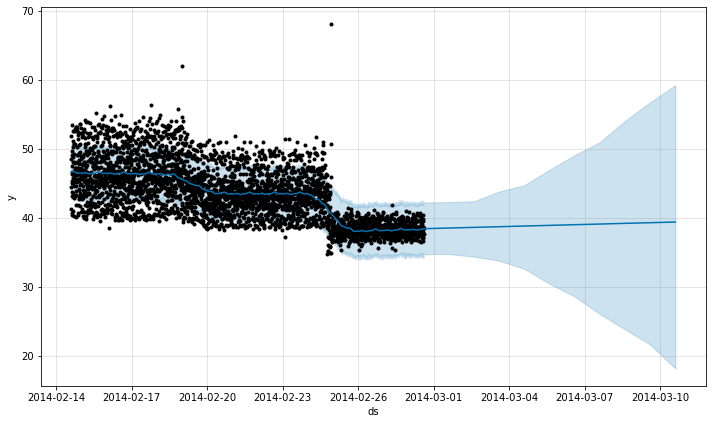

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

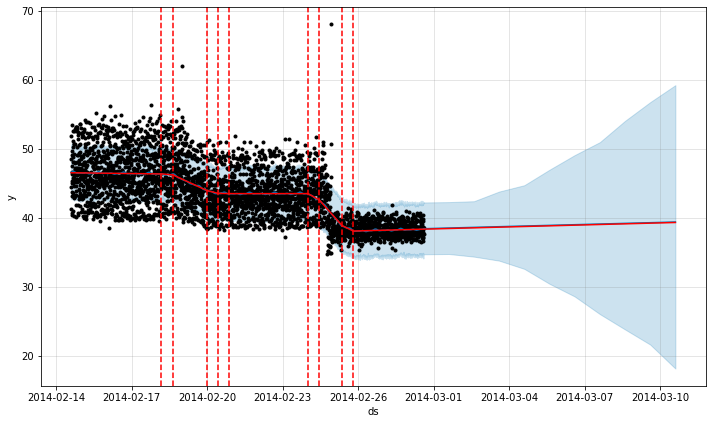

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

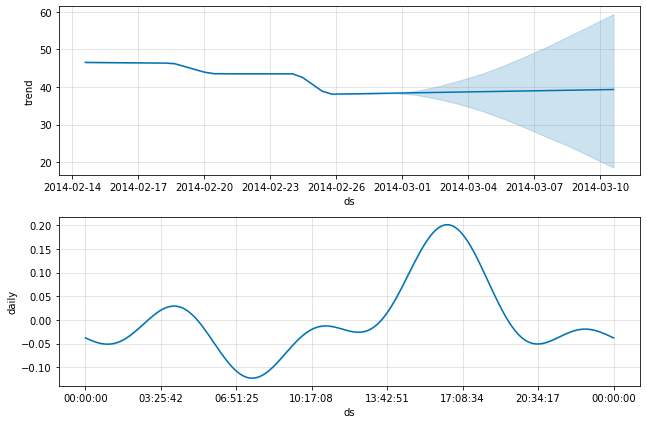

In [ ]:
fig = m.plot_components(forecast)

In [ ]:
m_cv = cross_validation(m, horizon='2 days')

INFO:fbprophet:Making 20 forecasts with cutoffs between 2014-02-18 02:22:00 and 2014-02-27 14:22:00
100%|██████████| 20/20 [00:38<00:00,  1.93s/it]
